In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('new_222_data_train_norm_decorr.csv')
df_test = pd.read_csv('new_222_data_test_norm_decorr.csv')
df.sample(3)

,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_mental_health_providers,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime,coastline_flag,Top_Marginal_Personal_Income_Tax_Rate,"Property_Tax_Burden_(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","Remaining_Tax_Burden(per $1,000 of personal income)",Estate_Inheritance_Tax_Levied_Flag,Recently_Legislated_Tax_Changes,Debt_Service_as_a_Share_of_Tax_Revenue,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Average Workers_Compensation_Costs_(per $100 of payroll),Tax_Expenditure_Limits,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Low_Cost_of_Living,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,pop_10yr_pct_chg,Prev_Yr_Agri_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,two_yrs_prior_pct_it_workers,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,population_2020,prev_yr_rent_50_2,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,microbusiness_density
2156,-1.150931,0.596393,0.757238,0.568499,0.276902,-1.452705,-0.816345,-0.247730,-0.126836,0.562613,0.802912,0.000836,0.939497,1.914852,0.125911,-1.354247,-0.877973,-0.784078,-0.291167,0.484571,-1.135008,-0.408132,0.635098,1.694905,0.129629,0.337510,0.076656,-0.437111,-0.807349,-0.623381,-0.982727,-0.539005,-1.412713,0.153660,-0.293729,-0.791200,-0.786629,-0.809439,-0.577741,0.548404,-1.375985,0.652597,0.831479,0.219221,-0.449156,-0.585985,0.674417,1.124355,-0.663799,-0.904973,-0.64453,1.537582,0.521353,-0.224186,-0.325416,-0.282838,1.217508,-0.025691,-0.104502,-0.241285,-0.952244,-0.438485,-0.533948,-0.714399,3.743789,-0.825013,0.258008,-1.272964,-1.078732,-0.855692,-0.248603,-0.580480,1.168772,-0.388945,-0.687732,1.354859
862,-0.193419,-0.780173,-0.434009,-0.435276,0.451718,-0.791305,-0.816345,1.416934,-1.741754,-1.236533,-1.360256,0.155328,0.390234,4.099118,2.525623,-1.440071,1.790697,-0.383948,-0.291167,-1.570762,1.346910,0.549191,-0.559180,-0.590063,0.075853,1.416906,-0.127039,-0.267434,-0.807349,-1.035076,1.138042,1.632955,1.185071,-0.548598,-0.748243,-0.831569,-1.136689,0.192549,0.118544,1.535107,-0.713348,-1.531729,-1.202197,0.219221,-0.449156,-0.585985,-1.482170,-0.889044,-0.663799,1.104564,1.55090,-0.650113,-0.025025,-0.564357,4.722911,-1.810119,-1.058249,-0.575579,-1.414650,-1.052543,-0.952244,-1.142877,-0.533948,-1.317632,7.787534,1.823155,2.334360,1.701301,1.904315,2.633875,-0.275007,-0.601073,-3.192074,1.950718,-0.644944,0.403969
1929,1.373418,-0.780173,-1.267882,0.166989,-0.636509,1.027544,1.264778,0.307158,1.084353,-0.149549,0.642677,-0.673314,0.809494,-0.362266,0.845824,-0.633323,-1.493820,1.360619,3.433091,-0.102667,0.814712,-1.321171,-1.517287,1.694905,0.168041,0.337510,-0.587881,0.439554,2.355008,-0.513595,0.077657,1.095959,0.802003,-0.637295,0.284361,-2.750495,0.864202,1.589981,-0.683260,0.229068,0.121809,-1.531729,-1.202197,-4.559792,-0.449156,1.705847,-1.482170,-0.889044,1.505880,1.10

In [3]:
X = df.loc[:, df.columns != 'microbusiness_density']
y = df['microbusiness_density']
y = np.log(y)

X_testt = df_test.loc[:, df_test.columns != 'microbusiness_density']
y_testt = df_test['microbusiness_density']
y_testt = np.log(y_testt)

## Sklearn MLP

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 20), max_iter=1000, alpha=0.00001,
                    solver='sgd', verbose=0, random_state=42, tol=0.000000001)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# test set
y_pred_testt = mlp.predict(X_testt)
print("Mean squared error: %.2f" % mean_squared_error(y_testt, y_pred_testt))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_testt, y_pred_testt)))

Mean squared error: 0.32
RMSE: 0.57
Mean squared error: 0.27
RMSE: 0.52


/Users/zzp/opt/anaconda3/envs/py39_PyTorch/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Manual PyTorch

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
# bulid a 3 layer MLP model in pytorch
class MLPRegressor(nn.Module):
    def __init__(self, input_dim, shirnk, output_dim):
        super().__init__()
        self.hidden_dim_1 = int(input_dim*shirnk)
        self.hidden_dim_2 = int(input_dim*shirnk*shirnk)
        self.hidden_dim_3 = int(input_dim*shirnk*shirnk*shirnk)

        self.fc1 = nn.Linear(input_dim, self.hidden_dim_1)
        self.fc2 = nn.Linear(self.hidden_dim_1, self.hidden_dim_2)
        self.fc3 = nn.Linear(self.hidden_dim_2, self.hidden_dim_3)
        self.fc4 = nn.Linear(self.hidden_dim_3, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.fc4(x)

In [15]:
# build dataset and dataloader
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
dataset = MyDataset(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Epoch: 1 	Training Loss: 2.118866 	Testing Loss: 2.063309
Epoch: 11 	Training Loss: 2.075414 	Testing Loss: 2.013473
Epoch: 21 	Training Loss: 2.025803 	Testing Loss: 1.951481
Epoch: 31 	Training Loss: 1.954885 	Testing Loss: 1.890783
Epoch: 41 	Training Loss: 1.864939 	Testing Loss: 1.808658
Epoch: 51 	Training Loss: 1.757319 	Testing Loss: 1.701231
Epoch: 61 	Training Loss: 1.663793 	Testing Loss: 1.593145
Epoch: 71 	Training Loss: 1.529814 	Testing Loss: 1.482180
Epoch: 81 	Training Loss: 1.423028 	Testing Loss: 1.363168
Epoch: 91 	Training Loss: 1.288794 	Testing Loss: 1.243244
Epoch: 101 	Training Loss: 1.166902 	Testing Loss: 1.125190
Epoch: 111 	Training Loss: 1.057561 	Testing Loss: 1.022092
Epoch: 121 	Training Loss: 0.958782 	Testing Loss: 0.911163
Epoch: 131 	Training Loss: 0.868677 	Testing Loss: 0.834436
Epoch: 141 	Training Loss: 0.804806 	Testing Loss: 0.773129
Epoch: 151 	Training Loss: 0.762850 	Testing Loss: 0.737518
Epoch: 161 	Training Loss: 0.726780 	Testing Loss: 

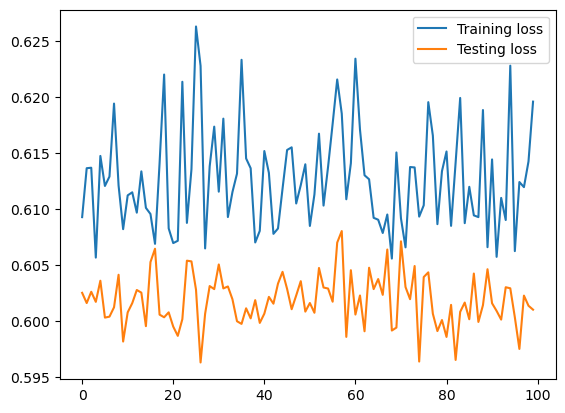

In [18]:
# train the model
def train(model, train_loader, optimizer, criterion):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    return train_loss / len(train_loader)

def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            output = model(data)
            test_loss += criterion(output, target).item()
    return test_loss / len(test_loader)

def train_model(model, train_loader, test_loader, optimizer, criterion, epochs):
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        train_loss = train(model, train_loader, optimizer, criterion)
        test_loss = test(model, test_loader, criterion)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        if epoch % 10 == 0:
            print('Epoch: {} \tTraining Loss: {:.6f} \tTesting Loss: {:.6f}'.format(epoch+1, train_loss, test_loss))
    return train_losses, test_losses

# train the model
model = MLPRegressor(input_dim=X.shape[1], shirnk=0.5, output_dim=1)
optimizer = optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.MSELoss()
train_losses, test_losses = train_model(model, train_loader, test_loader, optimizer, criterion, epochs=1000)

# plot the training and testing loss
plt.plot(train_losses[-100:], label='Training loss')
plt.plot(test_losses[-100:], label='Testing loss')
plt.legend()
plt.show()

In [19]:
# test set RMSE
y_pred_test = []
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        y_pred_test.append(output)

y_pred_test = torch.cat(y_pred_test, dim=0)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))


Mean squared error: 0.59
RMSE: 0.77
